# Stock Price Prediction using TimeSeries

In this notebook will be performed:
1. Importing Libraries
2. Preprocessing
3. Tesla Stock Market Analyis
4. Tesla ARIMA (AutoRegressive Integrated Moving Average) Time Series Prediction


In [2]:
#installing packages

%pip install seaborn
%pip install scikit-learn
%pip install statsmodels


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

C:\Users\ASUS\AppData\Local\Temp\ipykernel_26728\2725848234.py:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [4]:
warnings.filterwarnings('ignore')

# Preprocessing

# Tesla Stock Market Analysis


In [5]:
df = pd.read_csv("E:\\Time-Seires Stock market\\Data\\Stocks\\tsla.us.txt")
df.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2010-06-28,17.00,17.00,17.00,17.00,0,0
1,2010-06-29,19.00,25.00,17.54,23.89,18783276,0
2,2010-06-30,25.79,30.42,23.30,23.83,17194394,0
3,2010-07-01,25.00,25.92,20.27,21.96,8229863,0
4,2010-07-02,23.00,23.10,18.71,19.20,5141807,0


In [6]:
print(df.head())
print(df.shape)
print(df.columns)

         Date   Open   High    Low  Close    Volume  OpenInt
0  2010-06-28  17.00  17.00  17.00  17.00         0        0
1  2010-06-29  19.00  25.00  17.54  23.89  18783276        0
2  2010-06-30  25.79  30.42  23.30  23.83  17194394        0
3  2010-07-01  25.00  25.92  20.27  21.96   8229863        0
4  2010-07-02  23.00  23.10  18.71  19.20   5141807        0
(1858, 7)
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OpenInt'], dtype='object')


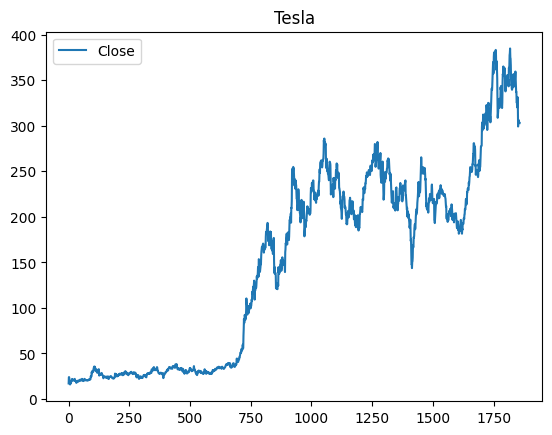

In [7]:
df[['Close']].plot()
plt.title("Tesla")
plt.show()

Text(0.5, 1.0, 'Tesla Cumulative Returns')

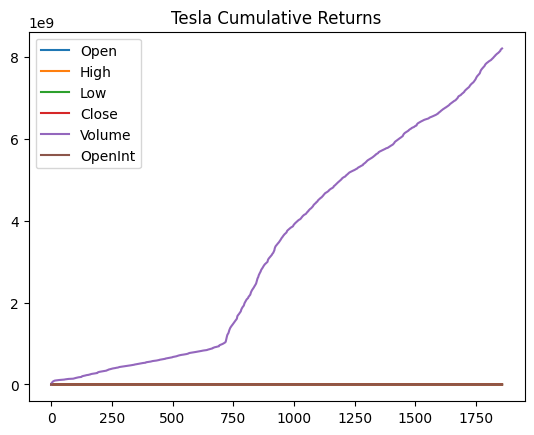

In [8]:
# Comulative Return
dr = df.cumsum()
dr.plot()
plt.title('Tesla Cumulative Returns')

Text(0.5, 1.0, 'Tesla Autocorrelation plot')

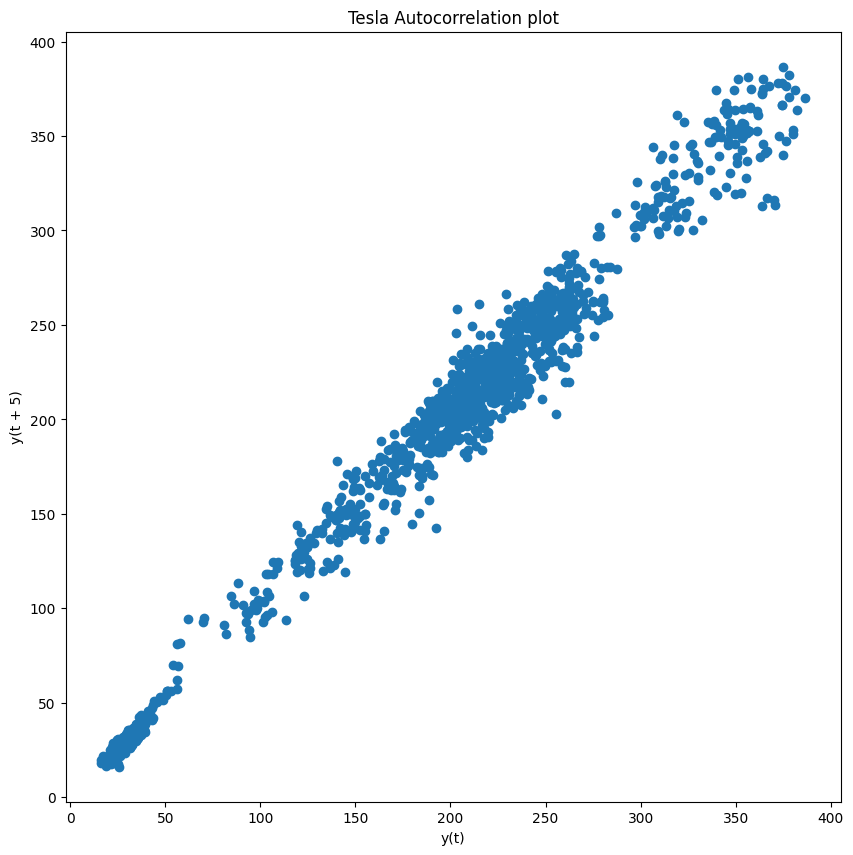

In [9]:
plt.figure(figsize=(10,10))
lag_plot(df['Open'], lag=5)
plt.title('Tesla Autocorrelation plot')

## ARIMA (AutoRegressive Integrated Moving Average) for Time Series Prediction

In [10]:
df['Date'][1857]

'2017-11-10'

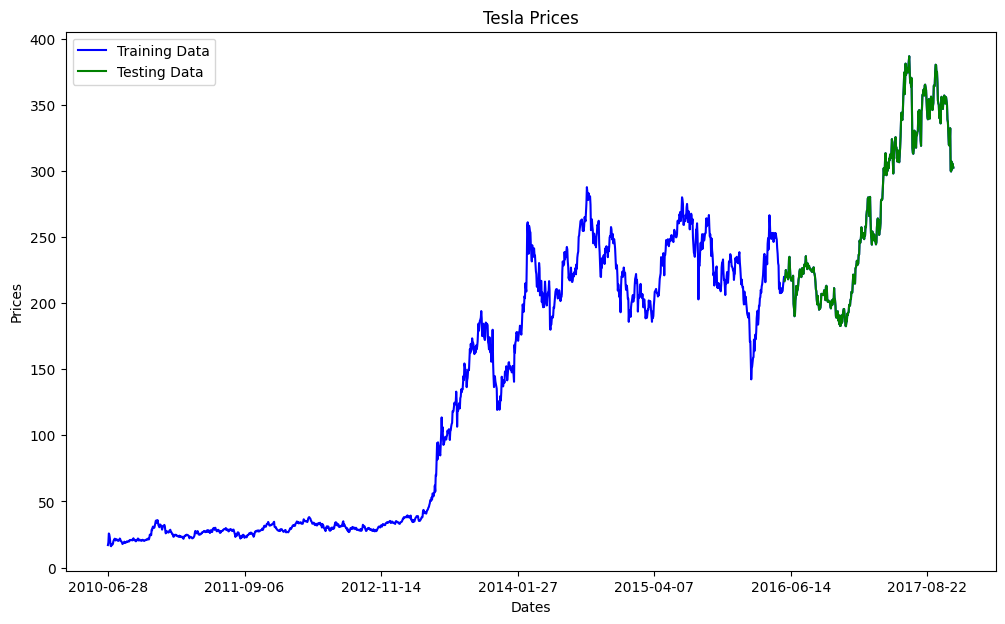

In [11]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(12,7))
plt.title('Tesla Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Open'], 'blue', label='Training Data')
plt.plot(test_data['Open'], 'green', label='Testing Data')
plt.xticks(np.arange(0,1857, 300), df['Date'][0:1857:300])
plt.legend()

In [12]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

<class 'list'>
Testing Mean Squared Error: 40.569
Symmetric mean absolute percentage error: 1.657


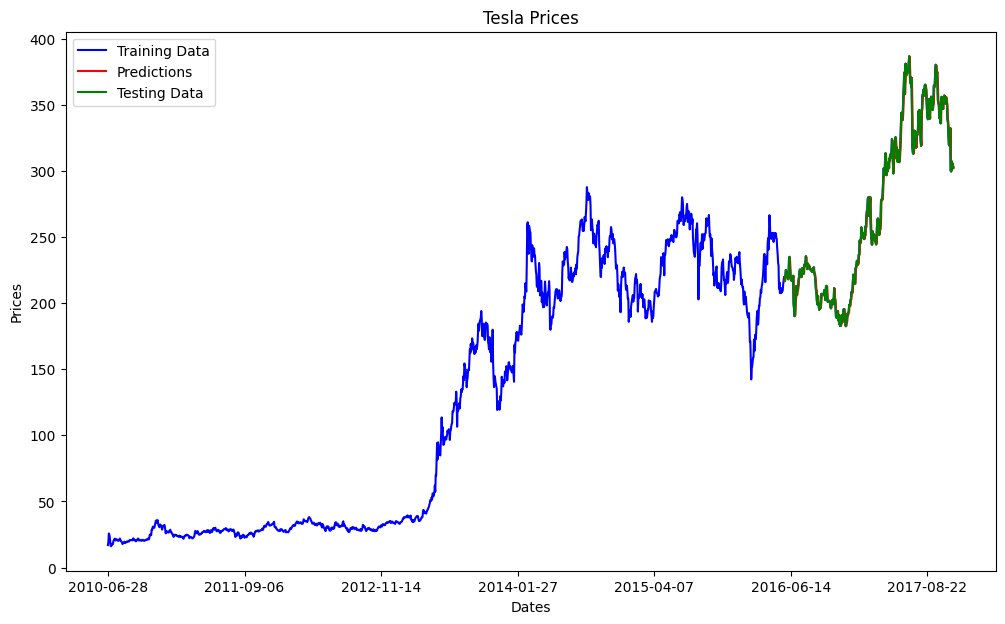

In [13]:
from pandas import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'smape_kun' is a custom function you defined

train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
train_ar = train_data['Open'].values
test_ar = test_data['Open'].values

history = [x for x in train_ar]
print(type(history))
predictions = []
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5, 1, 0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    # print('predicted=%f, expected=%f' % (yhat, obs))

error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)

# Assuming 'smape_kun' is a custom function you defined
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

plt.figure(figsize=(12, 7))
plt.title('Tesla Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Open'], 'blue', label='Training Data')
plt.plot(test_data.index, predictions, 'red', label='Predictions')
plt.plot(test_data.index, test_data['Open'], 'green', label='Testing Data')
plt.xticks(np.arange(0, 1857, 300), df['Date'][0:1857:300])
plt.legend()
plt.show()



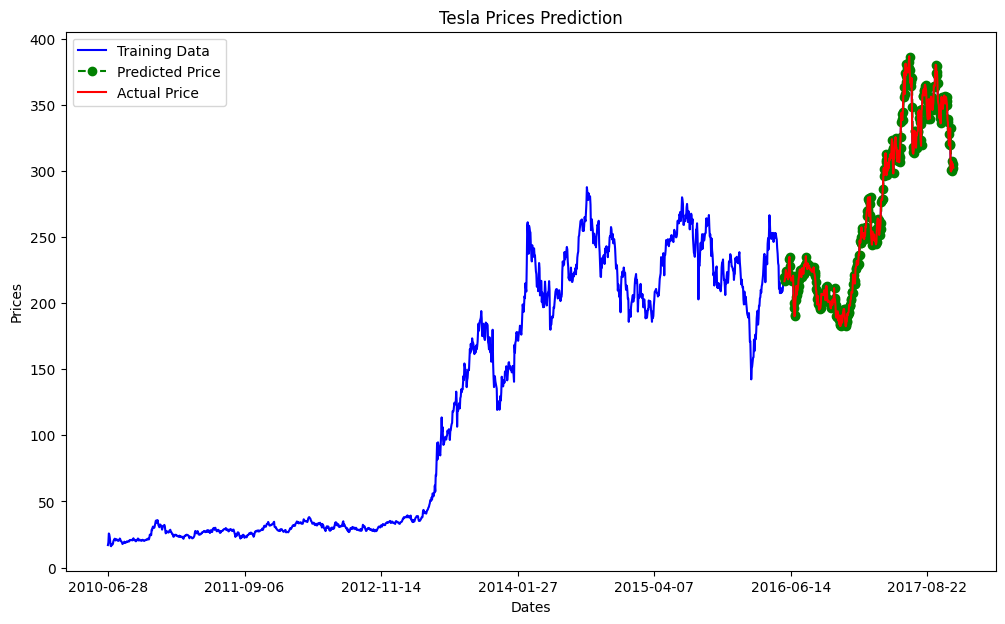

In [14]:
plt.figure(figsize=(12,7))
plt.plot(df['Open'], 'green', color='blue', label='Training Data')
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.title('Tesla Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(0,1857, 300), df['Date'][0:1857:300])
plt.legend()

In [15]:
test_data['Date'][0:1856:10]

1486    2016-05-24
1496    2016-06-08
1506    2016-06-22
1516    2016-07-07
1526    2016-07-21
1536    2016-08-04
1546    2016-08-18
1556    2016-09-01
1566    2016-09-16
1576    2016-09-30
1586    2016-10-14
1596    2016-10-28
1606    2016-11-11
1616    2016-11-28
1626    2016-12-12
1636    2016-12-27
1646    2017-01-11
1656    2017-01-26
1666    2017-02-09
1676    2017-02-24
1686    2017-03-10
1696    2017-03-24
1706    2017-04-07
1716    2017-04-24
1726    2017-05-08
1736    2017-05-22
1746    2017-06-06
1756    2017-06-20
1766    2017-07-05
1776    2017-07-19
1786    2017-08-02
1796    2017-08-16
1806    2017-08-30
1816    2017-09-14
1826    2017-09-28
1836    2017-10-12
1846    2017-10-26
1856    2017-11-09
Name: Date, dtype: object

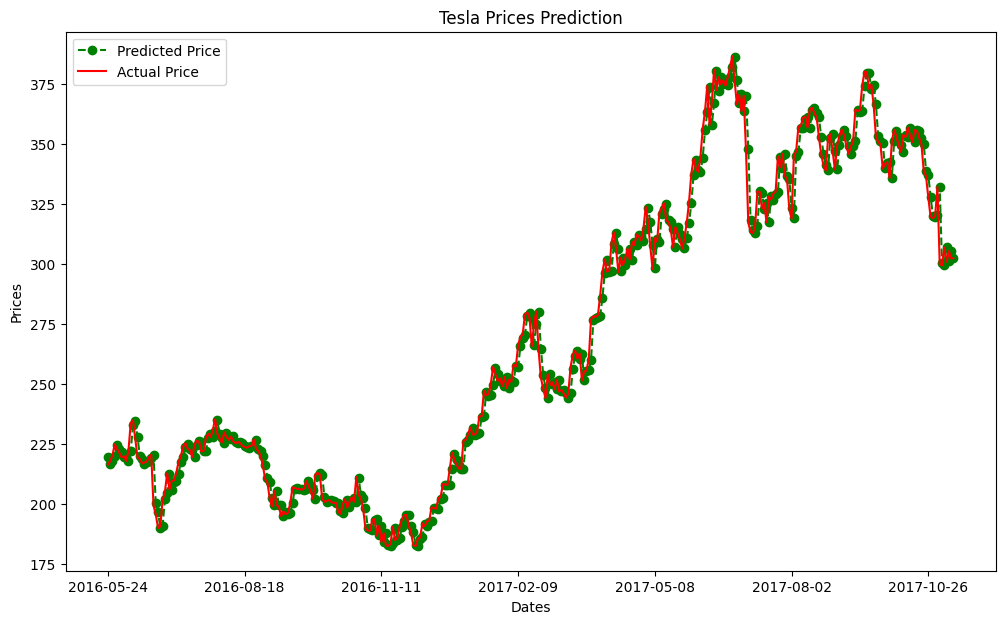

In [16]:
plt.figure(figsize=(12,7))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.xticks(np.arange(1486,1856, 60), df['Date'][1486:1856:60])
plt.title('Tesla Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()